# Creating a Wordcloud using NLP and TF-IDF in Python

A Wordcloud is a digital image the represents the importance of words in a text document. Here in this project, word importance is categorized by TF-IDF (Term Frequency Document Inverse Frequency).

I will be using an open source dataset containing christmas recipes to create a wordcloud containing the most important ingeredients used in these recipes. 

In [7]:
#initializing our needeed libraries and packages

import json #file is in json format
import pandas as pd
import re #regular expressions 
import nltk #natural learning toolkit
from nltk import download 
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords #stopword are the words that don't have valuable meaning in a corpus 
from wordcloud import WordCloud #wordcloud to visualize important words 
from nltk.stem import WordNetLemmatizer  #text lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samantha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Samantha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
#task 1 loading 
data = pd.read_json('recipes.json', lines = True)
data

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...
...,...,...,...,...,...,...
1612,Flavoured butters,https://www.bbcgoodfood.com/recipes/1911/flavo...,Try these different flavoured butters melted o...,Maxine Clark,"[100g softened butter, 2-3 tbsp chopped fresh ...",[Take100g/4oz softened butter and beat until c...
1613,Crispy Roast Duck,https://www.bbcgoodfood.com/recipes/3248/crisp...,"Duck basted to perfection, ideal for a Sunday ...",Ruth Watson,"[3 medium-sized duckss (each about 2¼kg/5lb), ...",[Remove the duck’s giblets and wash them. Cut ...
1614,Smoked salmon kedgeree,https://www.bbcgoodfood.com/recipes/3047/smoke...,This kedgeree is totally delicious. Treat ever...,Barney Desmazery,"[300g basmati rice, 8 eggs, 400g pack sliced s...","[To make the sauce, heat the butter in a large..."
1615,Spicy potted crab,https://www.bbcgoodfood.com/recipes/1797/spicy...,An ideal elegant starter for a wedding,Merrilees Parker,"[6 x 250g pkts unsalted butter, 2 tsp hot chil...",[ Heat the butter in a pan until melted. Turn ...


In [33]:
# I will only be using the 'Ingredients' column

data['Ingredients'].isnull().sum()

0

Data Cleaning

Using RegEx to clean the data

In [34]:
#first let's remove all of the nonalphabetical characters with an empty space. 
#So this will remove Digits and string punctuations without having to import .isalpha or string.punctuation
import re

data['Ingredients'] = data['Ingredients'].map(lambda x: re.sub(r'[^A-Za-z]',' ',str(x)))


In [35]:
data['Ingredients']

0           tbsp olive oil    knob butter      onion  ...
1            g butter  chopped       g dark muscovado ...
2            g dark muscovado sugar       g butter  ch...
3            g strong white flour  plus extra for dust...
4            g self raising flour       g golden caste...
                              ...                        
1612         g softened butter        tbsp chopped fre...
1613        medium sized duckss  each about   kg  lb  ...
1614         g basmati rice      eggs       g pack sli...
1615        x    g pkts unsalted butter      tsp hot c...
1616      all the innards  wings and bones from the du...
Name: Ingredients, Length: 1617, dtype: object

Stopword removal

In [36]:
#make our own stopwords as well as remove all englishstopwords 

stopword_list = stopwords.words('english') + ['tsp', 'tbsp', 'kg','pkts','extra','chopped']
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Data Cleaning 

Here I will be:
#create a function that'll take the text as string input then split the text into words 
#filter out words in our stopword list aka remove stopwords
#then apply the the lemmatization function to each word that is remaining 
#then join the result


In [37]:
def text_cleaning(text): 
    lemma = WordNetLemmatizer().lemmatize
    text = str(text)
    text = ' '.join([lemma(word) for word in text.split() if word not in stopword_list])
    return text
    

In [38]:
data['Ingredients'] = data['Ingredients'].apply(text_cleaning)

In [39]:
data['Ingredients']

0       olive oil knob butter onion finely g sausageme...
1       g butter g dark muscovado sugar g luxury mixed...
2       g dark muscovado sugar g butter g luxury mixed...
3       g strong white flour plus dusting g sachet fas...
4       g self raising flour g golden caster sugar g u...
                              ...                        
1612    g softened butter fresh mixed herb parsley che...
1613            medium sized duck lb giblet fine sea salt
1614    g basmati rice egg g pack sliced smoked salmon...
1615    x g unsalted butter hot chilli powder use pure...
1616    innards wing bone duck ml marsala medium onion...
Name: Ingredients, Length: 1617, dtype: object

# Term Frequency Document Inverse Frequency

 #Now I'm going to create a TF-IDF vectorizer that takes in a pair of words, so it'll take in the range (2,2) for the ngram. 
 
 An n-gram is just a string of n words in a row. Example ngram(a,b), where a is the minimum and b is the max number of grams
 
 If I wanted the vectorizer to just choose a single word, I'd pass in (1,1). 
 If I wanted the vectorizer to choose wither a single word, or a pair of words, I would pass in (1,2) 
 
 When it comes to recipes, pairs of words are important for example, "balsamic vinegar", "olive oil", "unsalted butter" etc 
 
 We'll also pass the stopwords list to the vectorizer. 
 We will also remove accents from the string by using unicode. 

In [55]:
#initializing our vectorizer 

vectorizer = TfidfVectorizer(ngram_range = ((2,2)), strip_accents = 'unicode')


In [56]:
tdm = vectorizer.fit_transform(data['Ingredients'])

In [57]:
vectorizer.vocabulary_.items()

dict_items([('olive oil', 10525), ('oil knob', 10397), ('knob butter', 7979), ('butter onion', 1664), ('onion finely', 10594), ('finely sausagemeat', 5509), ('sausagemeat skinned', 14145), ('skinned sausage', 14914), ('sausage grated', 14120), ('grated zest', 6676), ('zest lemon', 18763), ('lemon fresh', 8498), ('fresh white', 5970), ('white breadcrumb', 18326), ('breadcrumb ready', 1332), ('ready eat', 13083), ('eat dried', 4946), ('dried apricot', 4677), ('apricot chestnut', 290), ('chestnut canned', 2367), ('canned vacuum', 1913), ('vacuum packed', 17799), ('packed fresh', 11138), ('fresh dried', 5914), ('dried thyme', 4742), ('thyme cranberry', 17015), ('cranberry fresh', 3610), ('fresh frozen', 5919), ('frozen boneless', 6007), ('boneless skinless', 1086), ('skinless chicken', 14893), ('chicken breast', 2401), ('breast pack', 1373), ('pack ready', 11099), ('ready made', 13090), ('made shortcrust', 8996), ('shortcrust pastry', 14666), ('pastry beaten', 11440), ('beaten egg', 697), 

# Creating the WordCloud

So here I'll be getting the TF-IDF rate or score of each word pairings. 
Then these rates will be fed into the WordCloud generater to create a visual representation of word importance.  

In [58]:
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [59]:
tfidf_weights[0:10]

[('olive oil', 26.37784026154042),
 ('oil knob', 0.7274327230359054),
 ('knob butter', 6.14593998573951),
 ('butter onion', 3.6313658574444134),
 ('onion finely', 10.840221320883696),
 ('finely sausagemeat', 0.4004947804920915),
 ('sausagemeat skinned', 0.193734628126026),
 ('skinned sausage', 0.193734628126026),
 ('sausage grated', 0.193734628126026),
 ('grated zest', 9.794617999827695)]

# wordcloud 

In [53]:
w = WordCloud(width = 1500, height=1200, mode='RGBA', background_color = 'white', max_words=2000).fit_words(dict(tfidf_weights))

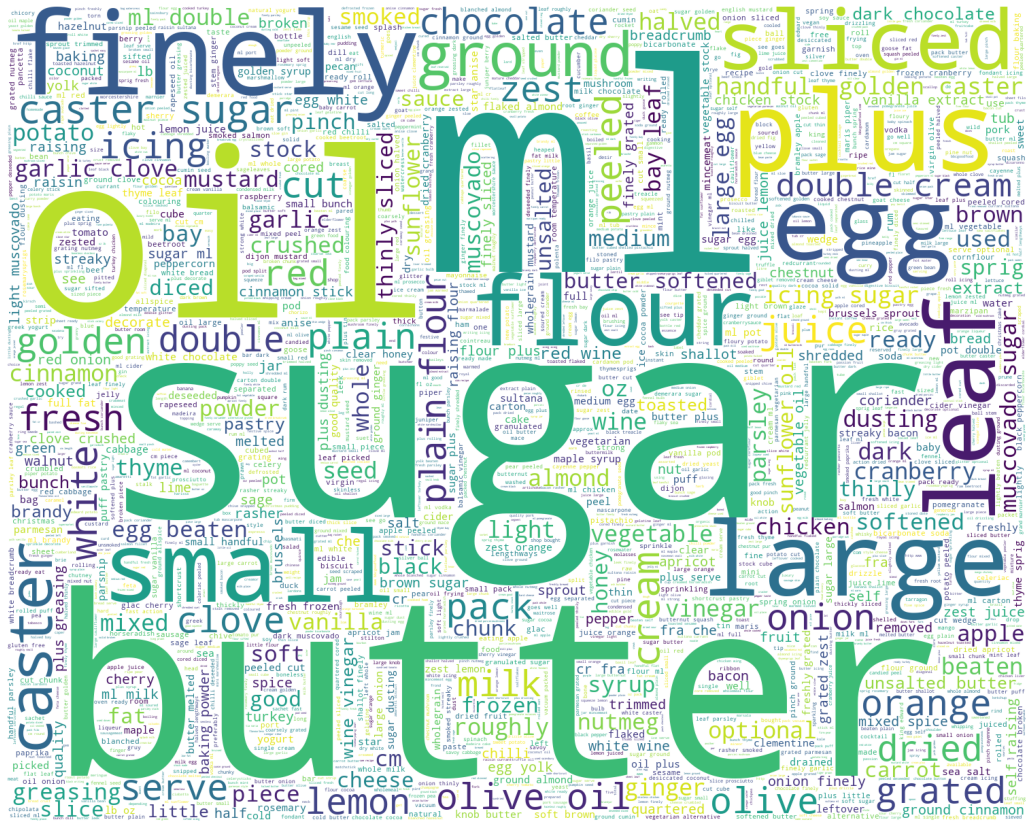

In [54]:
plt.figure(figsize = (20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')